<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/share_mh_ff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of mh_benefits 

In [ ]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy.stats import t

In [ ]:
# set color palete for graphs
blue_p = ["#185ea8", "#3372b5", "#568ffc", "#81aad6", "#a8c3e0"]

# download data from merged_data.csv
cd = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')

# print column values
print(cd['share_mh_ff'].value_counts())
print('\n')

# print year values
print(cd['year'].value_counts())
print('\n')

# visualize data
cd

Somewhat open                                            1255
Very open                                                 640
Somewhat not open                                         459
Neutral                                                   329
Not open at all                                           163
Not applicable to me (I do not have a mental illness)     112
Name: share_mh_ff, dtype: int64


2016    1433
2017     756
2018     417
2019     352
Name: year, dtype: int64




,self_employeed,company_size,tech_company,tech_prole,mh_benefits,anonymity,leaving_difficulty,disc_mh_coworker,disc_mh_supervisor,reveal_mh_business,reveal_mh_coworkers,affects_productivity,productivity_percent,mention_ph_interview,mention_mh_interview,share_mh_ff,exp_unsupport,reveal_less,family_history,mh_in_past,mh_currently,mh_diagnosed,sought_treatment,age,gender,country_live,state_live,country_work,state_work,year,gender_cleaned
0,False,26-100,True,NaN,Not eligible for coverage / NA,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,No,Yes,No,NaN,NaN,39.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
1,False,6-25,True,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,No,NaN,Yes,Yes,Yes,NaN,NaN,29.0,male,United States of America,Illinois,United States of America,Illinois,2016,male
2,False,6-25,True,NaN,No,I don't know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Somewhat open,Maybe/Not sure,NaN,No,Maybe,No,NaN,NaN,38.0,Male,United Kingdom,NaN,United Kingdom,NaN,2016,male
3,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sometimes, if it comes up","Sometimes, if it comes up",Yes,1-25%,Yes,NaN,Neutral,No,NaN,No,Yes,Yes,NaN,NaN,43.0,male,United Kingdom,NaN,United Kingdom,NaN,2016,male
4,False,6-25,False,True,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,NaN,Somewhat open,"Yes, I experienced",NaN,Yes,Yes,Yes,NaN,NaN,43.0,Female,United States of America,Illinois,United States of America,Illinois,2016,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,False,More than 1000,False,True,I don't know,I don't know,Somewhat difficult,No,No,NaN,NaN,NaN,NaN,Maybe,No,Very open,"Yes, I observed",Maybe,No,No,Maybe,NaN,False,27.0,male,India,NaN,India,NaN,2019,male
2954,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Yes,26-50%,Maybe,Maybe,Somewhat not open,"Yes, I observed",NaN,No,No,No,NaN,False,48.0,m,United States of America,Louisiana,United States of America,Louisiana,2019,male
2955,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable to me,Not applicable to me,Unsure,NaN,Yes,No,Very open,I've always been self-employed,NaN,No,No,No,NaN,False,50.0,M,India,NaN,India,NaN,2019,male
2956,False,More than 1000,True,True,No,Yes,Difficult,Maybe,No,NaN,NaN,NaN,NaN,No,No,Somewhat not open,Maybe/Not sure,Yes,No,No,Maybe,NaN,False,30.0,female,India,NaN,India,NaN,2019,female


## Notes


* % of `Yes` responses increases...
  * year-to-year, except for the last year
  * with age
  * with company size

* Those with `mh_benefits` find it more difficult to leave work than those without

* Those w/o `mh_benefits` are slightly more like to **not** discuss mh w/ their coworkers or supervisors

* Status of `mh_benefits` doesn't seem to impact `share_mh_ff`




## Basic Demographics

### Diagnoses by State

mh_diagnosed          No  Yes  sum
state_live                        
Alabama                0    3    3
Alaska                 0    1    1
Arizona                0    3    3
California             1   49   50
Colorado               0   11   11
Connecticut            0    1    1
District of Columbia   0    3    3
Florida                0    6    6
Georgia                0   10   10
Idaho                  0    1    1
Illinois               0   69   69
Indiana                1   17   18
Iowa                   0    5    5
Kansas                 0    4    4
Kentucky               0    4    4
Louisiana              1    1    2
Maine                  0    1    1
Maryland               0   12   12
Massachusetts          0   18   18
Michigan               0   22   22
Minnesota              1   24   25
Missouri               1    6    7
Nebraska               1   16   17
Nevada                 0    1    1
New Hampshire          0    6    6
New Jersey             0    7    7
New Mexico          

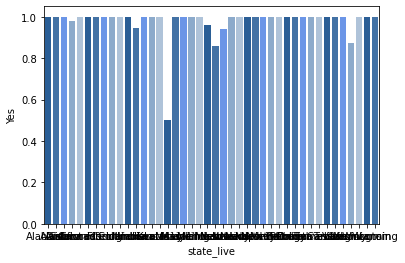

In [ ]:
dbs_cd = cd[pd.notna(cd["mh_diagnosed"])][["state_live", "mh_diagnosed", "year"]]

state_diagnoses = pd.pivot_table(dbs_cd, values="year", columns="mh_diagnosed", index="state_live", fill_value=0, aggfunc="count")
state_diagnoses["sum"] = state_diagnoses.sum(axis=1)
print(state_diagnoses, '\n\n')

age_range_comparison = state_diagnoses.loc[:,"No":"Yes"].div(state_diagnoses["sum"], axis=0)
print(age_range_comparison)
 
x = sns.barplot(x=age_range_comparison.index, y="Yes", data=age_range_comparison, palette = blue_p)

#age_range_comparison.plot(kind = "bar", stacked = True, colormap = blue_p)

### Willingness to share by state

share_mh_ff            Neutral  Not open at all  ...  Somewhat open  Very open
state_live                                       ...                          
Alabama               0.100000         0.000000  ...       0.500000   0.300000
Alaska                0.000000         0.250000  ...       0.000000   0.000000
Arizona               0.090909         0.000000  ...       0.272727   0.272727
California            0.095652         0.073913  ...       0.478261   0.204348
Colorado              0.100000         0.080000  ...       0.440000   0.160000
Connecticut           0.000000         0.000000  ...       0.750000   0.125000
Delaware              0.000000         0.000000  ...       0.000000   0.000000
District of Columbia  0.000000         0.000000  ...       1.000000   0.000000
Florida               0.054054         0.081081  ...       0.486486   0.162162
Georgia               0.142857         0.057143  ...       0.457143   0.228571
Idaho                 0.000000         0.000000  ...

ValueError: ignored

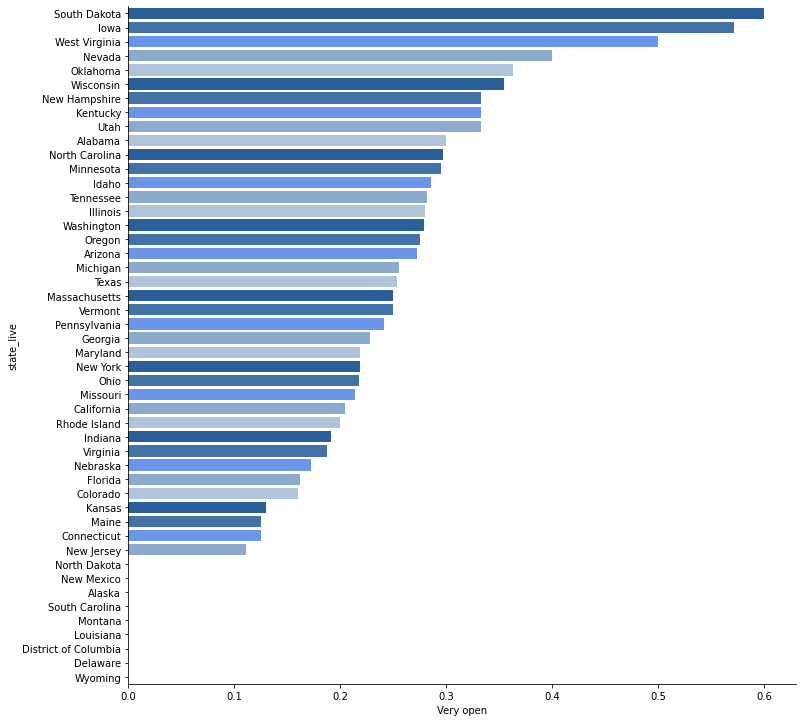

In [ ]:
wbs_cd = cd[pd.notna(cd["share_mh_ff"])][["state_live", "share_mh_ff", "year"]]

wbs_cd = wbs_cd[wbs_cd["share_mh_ff"] != 'Not applicable to me (I do not have a mental illness)']

state_willingness = pd.pivot_table(wbs_cd, values="year", columns="share_mh_ff", index="state_live", fill_value=0, aggfunc="count")
state_willingness["sum"] = state_willingness.sum(axis=1)
#print(state_willingness)

state_willingness_comparison = state_willingness.loc[:,"Neutral":"Very open"].div(state_willingness["sum"], axis=0)
print(state_willingness_comparison)

sortedStates = state_willingness_comparison["Very open"].sort_values(ascending=False)

#print(sortedStates)

state_willingness_comparison = state_willingness_comparison.sort_values(by="Very open", ascending=False)

x = sns.catplot(y=state_willingness_comparison.index, x="Very open", data=state_willingness_comparison, kind="bar", height=10, palette = blue_p)

#state_willingness_comparison.plot(kind = "bar", stacked = True)


### Gender

        gender  not_open%  somewhat_not%  ...  somewhat%     open%       na%
0         male   0.057254       0.157205  ...   0.424066  0.210577  0.040272
1       female   0.048101       0.153165  ...   0.439241  0.217722  0.034177
2  transgender   0.142857       0.285714  ...   0.214286  0.285714  0.000000
3        other   0.032787       0.081967  ...   0.344262  0.344262  0.032787

[4 rows x 7 columns]
Gender comparison:
	Standard error: 0.055333 
	P-value: 0.014568


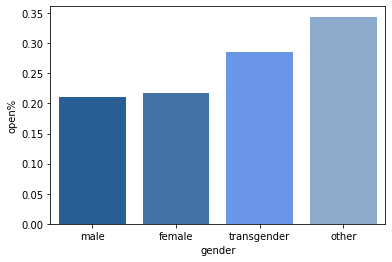

In [ ]:
male_df = cd[cd['gender_cleaned'] == 'male']
num_of_male = len(male_df)
num_of_not_open_male = len(male_df[male_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_male = len(male_df[male_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_male = len(male_df[male_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_male = len(male_df[male_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_male = len(male_df[male_df['share_mh_ff'] == 'Very open'])
num_of_na_male = len(male_df[male_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_male = ['male', (num_of_not_open_male/num_of_male), (num_of_somewhat_not_open_male/num_of_male), (num_of_neutral_male/num_of_male), (num_of_somewhat_open_male/num_of_male), (num_of_open_male/num_of_male), (num_of_na_male/num_of_male)]

female_df = cd[cd['gender_cleaned'] == 'female']
num_of_female = len(female_df)
num_of_not_open_female = len(female_df[female_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_female = len(female_df[female_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_female = len(female_df[female_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_female = len(female_df[female_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_female = len(female_df[female_df['share_mh_ff'] == 'Very open'])
num_of_na_female = len(female_df[female_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_female = ['female', (num_of_not_open_female/num_of_female), (num_of_somewhat_not_open_female/num_of_female), (num_of_neutral_female/num_of_female), (num_of_somewhat_open_female/num_of_female), (num_of_open_female/num_of_female), (num_of_na_female/num_of_female)]

transgender_df = cd[cd['gender_cleaned'] == 'transgender']
num_of_transgender = len(transgender_df)
num_of_not_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Very open'])
num_of_na_transgender = len(transgender_df[transgender_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_transgender = ['transgender', (num_of_not_open_transgender/num_of_transgender), (num_of_somewhat_not_open_transgender/num_of_transgender), (num_of_neutral_transgender/num_of_transgender), (num_of_somewhat_open_transgender/num_of_transgender), (num_of_open_transgender/num_of_transgender), (num_of_na_transgender/num_of_transgender)]

other_df = cd[cd['gender_cleaned'] == 'other']
num_of_other = len(other_df)
num_of_not_open_other = len(other_df[other_df['share_mh_ff'] == 'Not open at all'])
num_of_somewhat_not_open_other = len(other_df[other_df['share_mh_ff'] == 'Somewhat not open'])
num_of_neutral_other = len(other_df[other_df['share_mh_ff'] == 'Neutral'])
num_of_somewhat_open_other = len(other_df[other_df['share_mh_ff'] == 'Somewhat open'])
num_of_open_other = len(other_df[other_df['share_mh_ff'] == 'Very open'])
num_of_na_other = len(other_df[other_df['share_mh_ff'] == 'Not applicable to me (I do not have a mental illness)'])
row_other = ['other', (num_of_not_open_other/num_of_other), (num_of_somewhat_not_open_other/num_of_other), (num_of_neutral_other/num_of_other), (num_of_somewhat_open_other/num_of_other), (num_of_open_other/num_of_other), (num_of_na_other/num_of_other)]


lst = [row_male, row_female, row_transgender, row_other]
    
gender_comparison = pd.DataFrame(lst, columns =['gender', 'not_open%', 'somewhat_not%', 'neutral%', 'somewhat%', 'open%', 'na%'], dtype = float)
print(gender_comparison)

open_plot = sns.barplot(x="gender", y="open%", data=gender_comparison, palette = blue_p)

# gender_comparison.plot(kind="bar", stacked=True)

#males and females are less likley to be open to telling their families than transgender and other, with other being the most likely

#Null hypothesis: males and females are equally likely to be open to telling their families about mental health as trans and other categories:

replacement_scheme = {"Very open":1, "Somewhat open":0, "Neutral":0, "Somewhat not open":0, "Not open at all":0, "Not applicable to me (I do not have a mental illness)":0}
male_female_df = pd.concat([male_df,female_df], ignore_index=True)[["share_mh_ff"]]
open_male_female = len(male_female_df[male_female_df["share_mh_ff"] == "Very open"])
male_female_df["Very open"] = male_female_df["share_mh_ff"].replace(to_replace=replacement_scheme)

transgender_other_df = pd.concat([transgender_df, other_df], ignore_index=True)[["share_mh_ff"]]
open_transgender_other = len(transgender_other_df[transgender_other_df["share_mh_ff"] == "Very open"])
transgender_other_df["Very open"] = transgender_other_df["share_mh_ff"].replace(to_replace=replacement_scheme)

male_female_std = male_female_df.std(numeric_only=True)["Very open"]
transgender_other_std = transgender_other_df.std(numeric_only=True)["Very open"]

gender_standard_error = np.sqrt((np.power(male_female_std, 2)/len(male_female_df)) + (np.power(transgender_other_std, 2)/len(transgender_other_df)))

gender_prob_comparator = ((float(open_transgender_other)/float(len(transgender_other_df))) - (float(open_male_female)/float(len(male_female_df)))) / gender_standard_error

gender_p_value = 1 - t.cdf(gender_prob_comparator, df = len(male_female_df) + len(transgender_other_df) - 2)

print("Gender comparison:\n\tStandard error: %f \n\tP-value: %f"%(gender_standard_error, gender_p_value))

#P value is 0.0146, and so we can confidently reject the null hypothesis and say that men and women are, on average, less likely than transgender or other to be very open to
# telling their family

### Age

share_mh_ff  Neutral  ...     sum
age_range             ...        
(0, 20]          7.0  ...    27.0
(20, 30]       107.0  ...  1028.0
(30, 40]       147.0  ...  1280.0
(40, 50]        49.0  ...   480.0
(50, 60]        14.0  ...   114.0
(60, 100]        4.0  ...    25.0

[6 rows x 7 columns] 


share_mh_ff   Neutral  ...  Very open
age_range              ...           
(0, 20]      0.259259  ...   0.111111
(20, 30]     0.104086  ...   0.213035
(30, 40]     0.114844  ...   0.225000
(40, 50]     0.102083  ...   0.208333
(50, 60]     0.122807  ...   0.210526
(60, 100]    0.160000  ...   0.240000

[6 rows x 6 columns]
Age comparison:
	Standard error: 0.059314 
	P-value: 0.003770


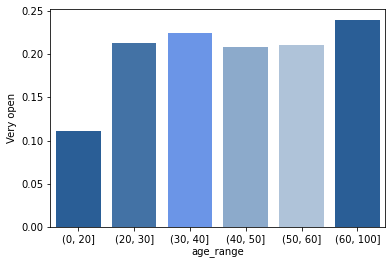

In [ ]:
cd['age_range'] = pd.cut(cd['age'], [0, 20, 30, 40, 50, 60, 100])
age_range_pt = cd.pivot_table('age', index='age_range', columns='share_mh_ff', aggfunc='count')
age_range_pt["sum"] = age_range_pt.sum(axis=1)
print(age_range_pt, '\n\n')

age_range_comparison = age_range_pt.loc[:,"Neutral":"Very open"].div(age_range_pt["sum"], axis=0)
print(age_range_comparison)

x = sns.barplot(x=age_range_comparison.index, y="Very open", data=age_range_comparison, palette = blue_p)

#age_range_comparison.plot(kind="bar", stacked=True)
#Empoyees aged 0-20 seem less likely to be willing to share their mental health with family/friends than older employees

#Null hypothesis: employees aged 0-20 are no less likely to be willing to share their mental health with family/friends than older employees

replacement_scheme = {"Very open":1, "Somewhat open":0, "Neutral":0, "Somewhat not open":0, "Not open at all":0, "Not applicable to me (I do not have a mental illness)":0}
young_df = cd[cd["age"] < 20][["share_mh_ff"]]
open_young = len(young_df[young_df["share_mh_ff"] == "Very open"])
young_df["Very open"] = young_df["share_mh_ff"].replace(to_replace=replacement_scheme)

old_df = cd[cd["age"] >= 20][["share_mh_ff"]]
open_old = len(old_df[old_df["share_mh_ff"] == "Very open"])
old_df["Very open"] = old_df["share_mh_ff"].replace(to_replace=replacement_scheme)

young_std = young_df.std(numeric_only=True)["Very open"]
old_std = old_df.std(numeric_only=True)["Very open"]

age_standard_error = np.sqrt((np.power(young_std, 2)/len(young_df)) + (np.power(old_std, 2)/len(old_df)))

age_prob_comparator = ( (float(open_old)/float(len(old_df))) - (float(open_young)/float(len(young_df))) ) / age_standard_error

age_p_value = 1 - t.cdf(age_prob_comparator, df = len(young_df) + len(old_df) - 2)

print("Age comparison:\n\tStandard error: %f \n\tP-value: %f"%(age_standard_error, age_p_value))

#P value is ~.00377, and so we can confidently reject the null hypothesis and say that younger employees are significantly less likely to be very open to sharing their mental
#health issues with their family and friends than older coworkers are

## Other Values

### Company Size

share_mh_ff     Neutral  ...  sum
company_size             ...     
1-5                  10  ...   92
100-500              66  ...  612
26-100               59  ...  535
500-1000             23  ...  186
6-25                 48  ...  399
More than 1000       70  ...  630

[6 rows x 7 columns] 


share_mh_ff     Not open at all  Somewhat not open  Somewhat open  Very open
company_size                                                                
1-5                    0.065217           0.173913       0.358696   0.239130
100-500                0.053922           0.127451       0.436275   0.243464
26-100                 0.052336           0.151402       0.435514   0.218692
500-1000               0.037634           0.123656       0.446237   0.231183
6-25                   0.072682           0.162907       0.411028   0.187970
More than 1000         0.057143           0.182540       0.414286   0.209524


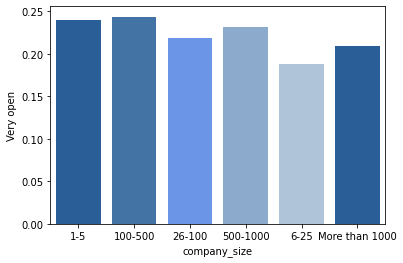

In [ ]:
company_size_pt = cd.pivot_table('age', index='company_size', columns='share_mh_ff', aggfunc='count')
company_size_pt["sum"] = company_size_pt.sum(axis=1)
print(company_size_pt, '\n\n')

company_size_comparison = company_size_pt.loc[:,"Not open at all":"Very open"].div(company_size_pt["sum"], axis=0)
print(company_size_comparison)

x = sns.barplot(x=company_size_comparison.index, y="Very open", data=company_size_comparison, palette = blue_p)
x

### Leaving Difficulty

share_mh_ff                 Neutral  Not open at all  ...  Very open  sum
leaving_difficulty                                    ...                
Difficult                        14               14  ...         22  112
I don't know                     33               14  ...         56  229
Neither easy nor difficult       30                6  ...         34  166
Somewhat difficult               19               10  ...         34  159
Somewhat easy                    31               18  ...         91  356
Very easy                        38               13  ...        103  286

[6 rows x 6 columns] 


share_mh_ff                 Not open at all  ...  Very open
leaving_difficulty                           ...           
I don't know                       0.061135  ...   0.244541
Difficult                          0.125000  ...   0.196429
Somewhat difficult                 0.062893  ...   0.213836
Neither easy nor difficult         0.036145  ...   0.204819
Somewhat easy          

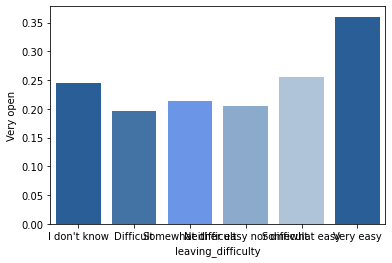

In [ ]:
leaving_difficulty_pt = cd.pivot_table('age', index='leaving_difficulty', columns='share_mh_ff', aggfunc='count')
leaving_difficulty_pt["sum"] = leaving_difficulty_pt.sum(axis=1)
print(leaving_difficulty_pt, '\n\n')

leaving_difficulty_comparison = leaving_difficulty_pt.loc[:,"Not open at all":"Very open"].div(leaving_difficulty_pt["sum"], axis=0)
leaving_difficulty_comparison["sort_col"] = [1, 0, 3, 2, 4, 5]
leaving_difficulty_comparison = leaving_difficulty_comparison.sort_values(by="sort_col").drop(columns="sort_col")
print(leaving_difficulty_comparison)

x = sns.barplot(x=leaving_difficulty_comparison.index, y="Very open", data=leaving_difficulty_comparison, palette = blue_p)

# It would seem that employees who consider it very easy to leave their jobs are more likely to talk about their mental health with their friends and families than employees who do not

replacement_scheme = {"Very open":1, "Somewhat open":0, "Neutral":0, "Somewhat not open":0, "Not open at all":0, "Not applicable to me (I do not have a mental illness)":0}
willing_to_leave_df = pd.concat([cd[cd["leaving_difficulty"] == "Very easy"], cd[cd["leaving_difficulty"] == "Somewhat easy"]], ignore_index=True)[["share_mh_ff"]]
open_willing = len(willing_to_leave_df[willing_to_leave_df["share_mh_ff"] == "Very open"])
willing_to_leave_df["Very open"] = willing_to_leave_df["share_mh_ff"].replace(to_replace=replacement_scheme)

unwilling_to_leave_df = pd.concat([cd[cd["leaving_difficulty"] == "Difficult"], cd[cd["leaving_difficulty"] == "Somewhat difficult"], cd[cd["leaving_difficulty"] == "Neither easy nor difficult"]], ignore_index=True)[["share_mh_ff"]]
open_unwilling = len(unwilling_to_leave_df[unwilling_to_leave_df["share_mh_ff"] == "Very open"])
unwilling_to_leave_df["Very open"] = unwilling_to_leave_df["share_mh_ff"].replace(to_replace=replacement_scheme)

willing_std = willing_to_leave_df.std(numeric_only=True)["Very open"]
unwilling_std = unwilling_to_leave_df.std(numeric_only=True)["Very open"]

leaving_standard_error = np.sqrt((np.power(willing_std, 2)/len(willing_to_leave_df)) + (np.power(unwilling_std, 2)/len(unwilling_to_leave_df)))

leaving_prob_comparator = ( (float(open_willing)/float(len(willing_to_leave_df))) - (float(open_unwilling)/float(len(unwilling_to_leave_df))) ) / leaving_standard_error

leaving_p_value = 1 - t.cdf(leaving_prob_comparator, df = len(willing_to_leave_df) + len(unwilling_to_leave_df) - 2)

print("Leaving Difficulty comparison:\n\tStandard error: %f \n\tP-value: %f"%(leaving_standard_error, leaving_p_value))

#With a p value of 0.00015, we can reject the null hypothesis and confidently say that people who consider it easier to leave their jobs are more likely to be willing to talk about their mental health than people who do not

### Discuss MH w/ Coworkers

share_mh_ff       Neutral  Not open at all  ...  Very open  sum
disc_mh_coworker                            ...                
Maybe                  84               16  ...        129  574
No                     44               51  ...         38  327
Yes                    37                8  ...        173  407

[3 rows x 6 columns] 


share_mh_ff       Not open at all  Somewhat not open  Somewhat open  Very open
disc_mh_coworker                                                              
Maybe                    0.027875           0.163763       0.437282   0.224739
No                       0.155963           0.256881       0.336391   0.116208
Yes                      0.019656           0.056511       0.407862   0.425061


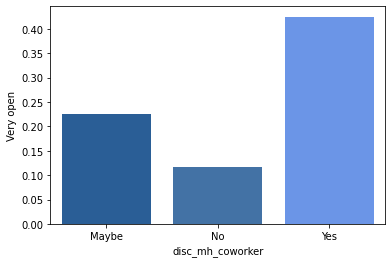

In [ ]:
disc_mh_coworker_pt = cd.pivot_table('age', index='disc_mh_coworker', columns='share_mh_ff', aggfunc='count')
disc_mh_coworker_pt["sum"] = disc_mh_coworker_pt.sum(axis=1)
print(disc_mh_coworker_pt, '\n\n')

disc_mh_coworker_comparison = disc_mh_coworker_pt.loc[:,"Not open at all":"Very open"].div(disc_mh_coworker_pt["sum"], axis=0)
print(disc_mh_coworker_comparison)

x = sns.barplot(x=disc_mh_coworker_comparison.index, y="Very open", data=disc_mh_coworker_comparison, palette = blue_p)
x

## Year-to-Year

### Survey Response

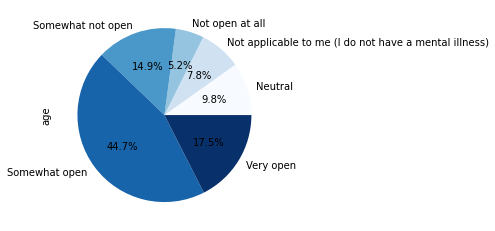

In [ ]:
# 2016
data_2016 = cd[cd['year'] == 2016]
data = data_2016.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%", colormap = "Blues")

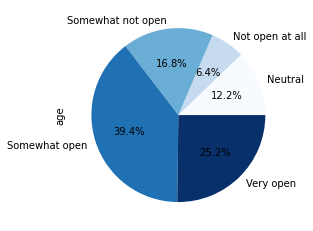

In [ ]:
# 2017
data_2017 = cd[cd['year'] == 2017]
data = data_2017.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%", colormap = "Blues")

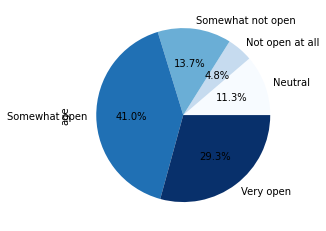

In [ ]:
# 2018
data_2018 = cd[cd['year'] == 2018]
data = data_2018.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%", colormap = "Blues")

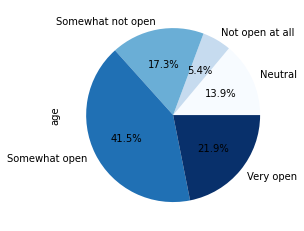

In [ ]:
# 2019
data_2019 = cd[cd['year'] == 2019]
data = data_2019.groupby('share_mh_ff').count()['age']
data.plot.pie(autopct="%.1f%%", colormap = "Blues")

In [ ]:
#a

## Hypothesis Testing

In [ ]:
#a

replacement_scheme = {"Very open":1, "Somewhat open":0, "Neutral":0, "Somewhat not open":0, "Not open at all":0, "Not applicable to me (I do not have a mental illness)":0}

data_2016 = cd[cd['year'] == 2016]
data_2016["very_open"] = data_2016["share_mh_ff"].replace(to_replace=replacement_scheme)

data_2017 = cd[cd['year'] == 2017]
data_2017["very_open"] = data_2017["share_mh_ff"].replace(to_replace=replacement_scheme)

data_2018 = cd[cd['year'] == 2018]
data_2018["very_open"] = data_2018["share_mh_ff"].replace(to_replace=replacement_scheme)

data_2019 = cd[cd['year'] == 2019]
data_2019["very_open"] = data_2019["share_mh_ff"].replace(to_replace=replacement_scheme)

mean_2016 = float(data_2016.sum()["very_open"]) / float(len(data_2016))
mean_2017 = float(data_2017.sum()["very_open"]) / float(len(data_2017))
mean_2018 = float(data_2018.sum()["very_open"]) / float(len(data_2018))
mean_2019 = float(data_2019.sum()["very_open"]) / float(len(data_2019))

std_2016 = data_2016.std(numeric_only=True)["very_open"]
std_2017 = data_2017.std(numeric_only=True)["very_open"]
std_2018 = data_2018.std(numeric_only=True)["very_open"]
std_2019 = data_2019.std(numeric_only=True)["very_open"]

#Hypothesis 1: The number of people who were very open to sharing about their mental health in 2017 is significantly greater than in 2016
#Null Hypothesis: The number of people who were very open to sharing about their mental health is about the same in 2016 as 2017
years_standard_error = np.sqrt( ( np.power(std_2016, 2) / len(data_2016) ) + ( np.power(std_2017, 2) / len(data_2017) ) )
years_prob_comparator = ( mean_2017 - mean_2016 ) / years_standard_error
print("'16 - '17 p-value: %f"%(1-t.cdf(years_prob_comparator, df = len(data_2016) + len(data_2017) - 2)))
# p-value is 0.000024, we reject the NH

#Hypothesis 2: The number of people who were very open to sharing about their mental health in 2017 is significantly greater than in 2016
#Null Hypothesis: The number of people who were very open to sharing about their mental health is about the same in 2016 as 2017
years_standard_error = np.sqrt( ( np.power(std_2017, 2) / len(data_2017) ) + ( np.power(std_2018, 2) / len(data_2018) ) )
years_prob_comparator = ( mean_2018 - mean_2017 ) / years_standard_error
print("'17 - '18 p-value: %f"%(1-t.cdf(years_prob_comparator, df = len(data_2017) + len(data_2018) - 2)))
# p-value is 0.065750, we do not reject the NH

#Hypothesis 2: The number of people who were very open to sharing about their mental health in 2017 is significantly greater than in 2016
#Null Hypothesis: The number of people who were very open to sharing about their mental health is about the same in 2016 as 2017
years_standard_error = np.sqrt( ( np.power(std_2018, 2) / len(data_2018) ) + ( np.power(std_2019, 2) / len(data_2019) ) )
years_prob_comparator = ( mean_2018 - mean_2019 ) / years_standard_error
print("'18 - '19 p-value: %f"%(1-t.cdf(years_prob_comparator, df = len(data_2018) + len(data_2019) - 2)))
# p-value is 0.009445, we reject the NH





'16 - '17 p-value: 0.000024
'17 - '18 p-value: 0.065750
'18 - '19 p-value: 0.009445


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand